
# <font color = green>CNN Skin Cancer detection assignment<font>

##### <font color = green> By: Mohammad Shahid rashid <font>
    
 


## <font color = blue>Problem Statement  <font>
`To build a CNN based model which can accurately detect melanoma`. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.
The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

**<font color="blue">Input Data:</font>**
- `https://drive.google.com/file/d/1xLfSQUGDl8ezNNbUkpuHOYvSpTyxVhCs/view`

    
## <font color = red> Business Goal  <font>

 
To build a CNN based model which can accurately detect melanoma

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [5]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [7]:
# Pointing to base path for train and test data set
base_path = 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/'

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(base_path + 'Train')  ## path_to_train_directory
data_dir_test = pathlib.Path(base_path + 'Test')    ## path_to_test_directory

In [9]:
# Verify the path of train and test
print(data_dir_train)
print(data_dir_test)

gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train
gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [10]:
# Lets verify count of images
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train image count: ", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test image count : ",image_count_test)

Train image count:  2239
Test image count :  118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [11]:
#importing Keras libraries
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from glob import glob
from tensorflow.keras.regularizers import l2

### Create a dataset

Define some parameters for the loader:

In [12]:
batch_size = 32
img_height = 180
img_width = 180

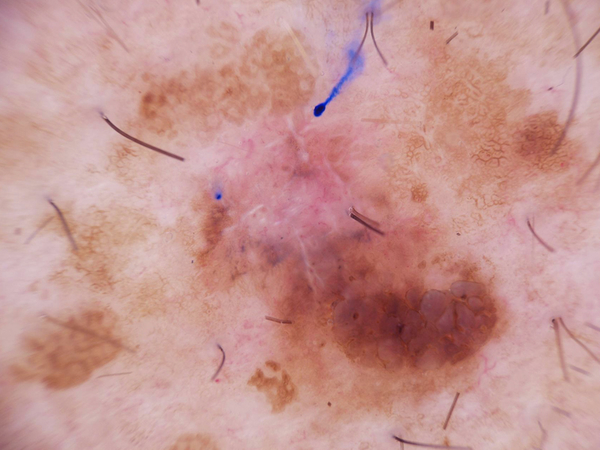

In [13]:
# Let's visualize one image first, to verify it is working or not.
basal_cell_carcinoma = list(data_dir_train.glob('basal cell carcinoma/*'))
PIL.Image.open(str(basal_cell_carcinoma[1]))

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               batch_size=batch_size,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               image_size=(img_height,img_width),
                                                               seed=123)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(directory=data_dir_train,
                                                               batch_size=batch_size,
                                                               validation_split=0.2,
                                                               subset="validation",
                                                               image_size=(img_height,img_width),
                                                               seed=123)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

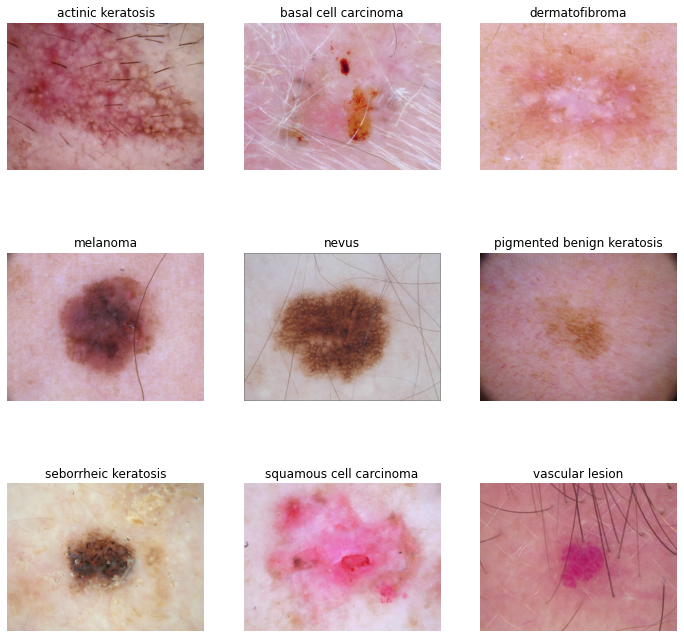

In [17]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

import matplotlib.image as mpimg


plt.figure(figsize=(12, 12))
for i in range(len(class_names)):
  ax = plt.subplot(3, 3, i + 1)
  image_list = list(data_dir_train.glob(class_names[i] + '/*.jpg'))
  plt.imshow(mpimg.imread(image_list[0]))                    # Displaying one instance of all 9 classes.
  plt.title(class_names[i])
  plt.axis("off")

plt.show()

In [18]:
for image_batch, labels_batch in train_ds:
  print("image_batch: ", image_batch.shape)
  print("labels_batch: ", labels_batch.shape)
  break

image_batch:  (32, 180, 180, 3)
labels_batch:  (32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [20]:
### Your code goes here
# Below are readymade snippet from the class notes python file. Which is best to use it
# model architecture
num_classes = len(class_names)

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))])

# first convolutional layer
model.add(Conv2D(32, kernel_size= (3, 3), activation='relu'))

# second convolutional layer
model.add(Conv2D(64, kernel_size= (3, 3), activation='relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the pooling layer to give us a long vector and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [21]:
### Todo, choose an appropirate optimiser and loss function
## Using adam optmiser and adding loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 495616)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               63438976  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1

### Train the model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 701s 859ms/step - loss: 2.6318 - accuracy: 0.3151 - val_loss: 1.5604 - val_accuracy: 0.4469
Epoch 2/20
169/169 [==============================] - 6s 38ms/step - loss: 1.4158 - accuracy: 0.5048 - val_loss: 1.3523 - val_accuracy: 0.5026
Epoch 3/20
169/169 [==============================] - 6s 38ms/step - loss: 1.0269 - accuracy: 0.6532 - val_loss: 1.1522 - val_accuracy: 0.6021
Epoch 4/20
169/169 [==============================] - 6s 38ms/step - loss: 0.6986 - accuracy: 0.7789 - val_loss: 0.9945 - val_accuracy: 0.6845
Epoch 5/20
169/169 [==============================] - 6s 38ms/step - loss: 0.5875 - accuracy: 0.8173 - val_loss: 0.8989 - val_accuracy: 0.7216
Epoch 6/20
169/169 [==============================] - 6s 38ms/step - loss: 0.4449 - accuracy: 0.8633 - val_loss: 1.0681 - val_accuracy: 0.7075
Epoch 7/20
169/169 [==============================] - 6s 38ms/step - loss: 0.3053 - accuracy: 0.9121 - val_loss: 0.9146 - val_accuracy: 0.7

### Visualizing training results

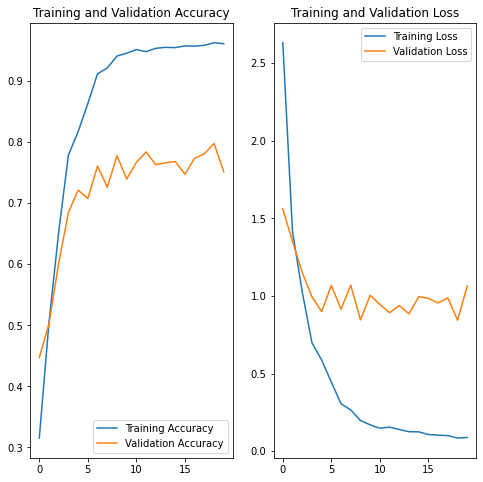

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit


**Observation:**


When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as Overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process.
- **Data augmentation:**
- **Dropouts:**


** **


**Data augmentation:**

Data augmentation takes the approach of generating additional training data from our existing examples by augmenting them using random transformations that yield believable looking images. This helps expose the model to more aspects of the data and generalize better.

**Dropouts:**

When we apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

augmentation_strategy = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

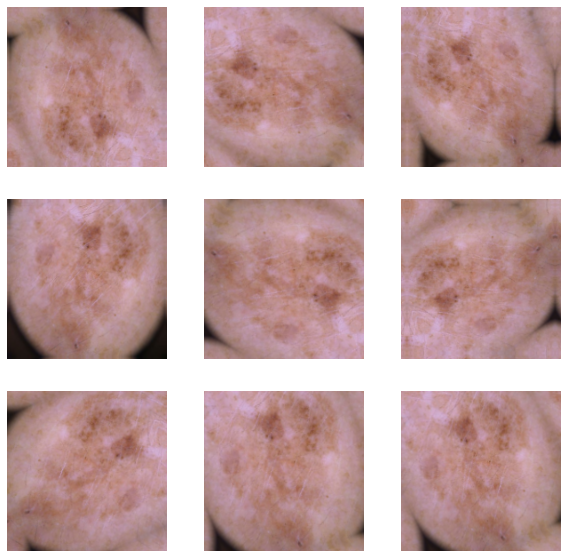

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images in train_ds.take(1):
  for i in range(9):
    augmented_img = augmentation_strategy(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [27]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Use the readymade code from classroom pythin file explain by professor

model = Sequential([
  augmentation_strategy,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [28]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)       

### Training the model

In [30]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs
                   )   ## your training code

Epoch 1/20
169/169 [==============================] - 4s 18ms/step - loss: 1.8602 - accuracy: 0.2925 - val_loss: 1.6205 - val_accuracy: 0.3920
Epoch 2/20
169/169 [==============================] - 3s 17ms/step - loss: 1.4895 - accuracy: 0.4440 - val_loss: 1.3752 - val_accuracy: 0.4521
Epoch 3/20
169/169 [==============================] - 3s 17ms/step - loss: 1.3938 - accuracy: 0.4770 - val_loss: 1.3198 - val_accuracy: 0.5026
Epoch 4/20
169/169 [==============================] - 3s 17ms/step - loss: 1.3155 - accuracy: 0.5000 - val_loss: 1.3061 - val_accuracy: 0.4959
Epoch 5/20
169/169 [==============================] - 3s 17ms/step - loss: 1.2708 - accuracy: 0.5104 - val_loss: 1.2246 - val_accuracy: 0.5085
Epoch 6/20
169/169 [==============================] - 3s 17ms/step - loss: 1.2339 - accuracy: 0.5295 - val_loss: 1.2568 - val_accuracy: 0.5442
Epoch 7/20
169/169 [==============================] - 3s 17ms/step - loss: 1.1993 - accuracy: 0.5417 - val_loss: 1.1720 - val_accuracy: 0.5264

### Visualizing the results

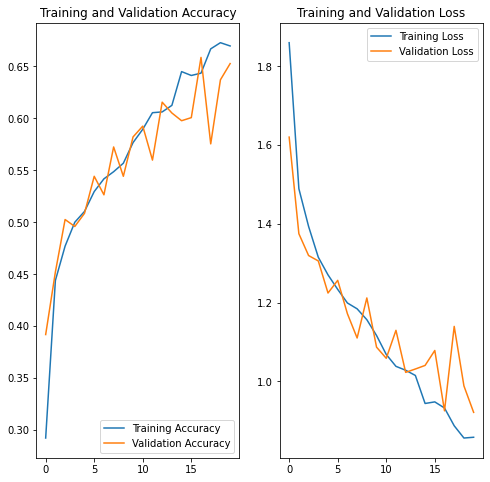

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

`You can see there were huge difference in train and test accuracy without applying augmentation which you can say as overfitting. But after applying augmentation accuracy for train and test are better.`

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [32]:
## Your code goes here.
for i in class_names:
  sample_count = len(list(data_dir_train.glob(i + '/*.jpg')))
  print(str(i) + " class contains around: " + str(sample_count) + " sample count.")

actinic keratosis class contains around: 114 sample count.
basal cell carcinoma class contains around: 376 sample count.
dermatofibroma class contains around: 95 sample count.
melanoma class contains around: 438 sample count.
nevus class contains around: 357 sample count.
pigmented benign keratosis class contains around: 462 sample count.
seborrheic keratosis class contains around: 77 sample count.
squamous cell carcinoma class contains around: 181 sample count.
vascular lesion class contains around: 139 sample count.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [33]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [34]:
path_to_training_dataset=str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F092C5A2F90>: 100%|██████████| 500/500 [00:17<00:00, 28.23 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F092F034710>: 100%|██████████| 500/500 [00:17<00:00, 28.92 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F092D84B4D0>: 100%|██████████| 500/500 [00:17<00:00, 28.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F092C5EB9D0>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7F092C530090>: 100%|██████████| 500/500 [01:20<00:00,  6.23 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F092F0AABD0>: 100%|██████████| 500/500 [00:17<00:00, 28.04 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F092F04B6D0>: 100%|██████████| 500/500 [00:40<00:00, 12.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F092C52C610>: 100%|██████████| 500/500 [00:17<00:00, 28.76 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F092F1550D0>: 100%|██████████| 500/500 [00:17<00:00, 28.92 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [35]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_7f6457c9-345b-4ac0-8297-d37cf8deb0f8.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033413.jpg_a2f4f265-1517-4437-84b0-4e6b71894bd9.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_02dcb9f4-229f-44fa-9721-33d33b87a3d9.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_86d94195-85e2-4570-b2f1-07cc9f0da422.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/ac

In [37]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [38]:
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [39]:
original_df.shape

(2239, 2)

In [40]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

In [41]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_7f6457c9-345b-4ac0-8297-d37cf8deb0f8.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033413.jpg_a2f4f265-1517-4437-84b0-4e6b71894bd9.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030408.jpg_02dcb9f4-229f-44fa-9721-33d33b87a3d9.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_86d94195-85e2-4570-b2f1-07cc9f0da422.jpg',
 'gdrive/My Drive/app/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output/ac

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [43]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [44]:
df_new = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df_new)


In [45]:
df_new.shape

(9000, 2)

In [46]:
new_df['Label'].value_counts()

pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [47]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training", ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation", ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
## your code goes here

model = Sequential([
  augmentation_strategy,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.BatchNormalization(),

  # 1st Convolution Layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # 2nd Convolution Layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # 3rd Convolution Layer
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # 4th Convolution Layer
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # 5th Convolution Layer
  layers.Conv2D(512, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  # FC layer
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes, activation='softmax')
])

In [51]:

# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 90, 90, 16)       

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [52]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [53]:
epochs = 50
## Your code goes here, use 50 epochs.
 
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs
                   )   # your model fit code

Epoch 1/50
281/281 [==============================] - 49s 165ms/step - loss: 2.1106 - accuracy: 0.2761 - val_loss: 2.7041 - val_accuracy: 0.1923
Epoch 2/50
281/281 [==============================] - 45s 157ms/step - loss: 1.6958 - accuracy: 0.3445 - val_loss: 1.7154 - val_accuracy: 0.3988
Epoch 3/50
281/281 [==============================] - 45s 158ms/step - loss: 1.5552 - accuracy: 0.3849 - val_loss: 1.3261 - val_accuracy: 0.4784
Epoch 4/50
281/281 [==============================] - 44s 154ms/step - loss: 1.4762 - accuracy: 0.4250 - val_loss: 1.2797 - val_accuracy: 0.4833
Epoch 5/50
281/281 [==============================] - 44s 155ms/step - loss: 1.4328 - accuracy: 0.4436 - val_loss: 1.2357 - val_accuracy: 0.4984
Epoch 6/50
281/281 [==============================] - 44s 155ms/step - loss: 1.3845 - accuracy: 0.4596 - val_loss: 1.1923 - val_accuracy: 0.5296
Epoch 7/50
281/281 [==============================] - 44s 155ms/step - loss: 1.3454 - accuracy: 0.4832 - val_loss: 1.1388 - val_ac

#### **Todo:**  Visualize the model results

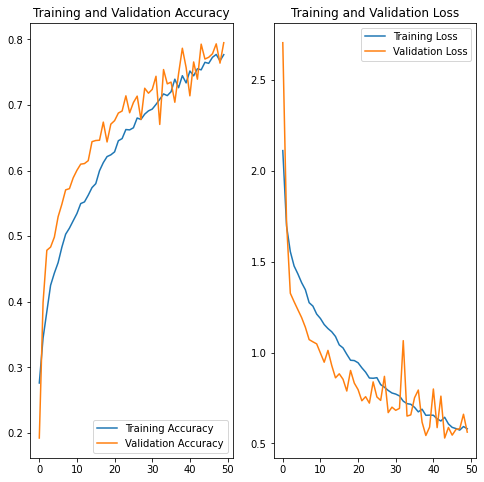

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Introducing Batch normalization smoothens the loss function that in turn by optimizing the model parameters improves the training speed of the model

- Train accuracy measured as 77.6%
- Test accuracy measures as  79.4%

This looks decent score